# Below is one clean approach to set up and solve a 2-DOF system where:
	1.	Mass 1 is connected to a moving base (ground actuator) via spring ￼ (and optional damper ￼, if needed).
	2.	Mass 2 is connected to Mass 1 via spring ￼ (and optionally ￼).
	3.	An external force ￼ acts directly on Mass 2.
	4.	The ground moves according to a known displacement function ￼.

In other words, the ground is not fixed at zero displacement but is itself an actuator providing a time-varying base displacement. Meanwhile, Mass 2 experiences an external forcing ￼.

Below is a step-by-step explanation and a working Python script. You can adapt it for any forcing shape ￼ and ground displacement ￼. Damping is optional but easy to include (it follows the same pattern).

1. System Setup

We have two masses:
	•	Mass 1 (￼) is attached to a moving base with displacement ￼ via spring ￼.
	•	Mass 2 (￼) is attached to Mass 1 via spring ￼.
	•	We let ￼ and ￼ be the absolute displacements of Mass 1 and Mass 2 (relative to an inertial reference frame).

￼
￼

1.1 Equations of Motion (No Damping)

Mass 1:
￼
	•	The spring ￼ pulls Mass 1 towards ￼.
	•	Spring ￼ pulls Mass 1 toward Mass 2 (or vice versa).

Mass 2:
￼
	•	Spring ￼ pulls Mass 2 toward Mass 1.
	•	￼ is an external force on Mass 2.

1.2 Optional Damping

If you also want dampers:
	•	A damper ￼ between Mass 1 and the ground actuator ￼ damping force ￼.
	•	A damper ￼ between Mass 1 and Mass 2 ￼ damping force ￼.

Then add those damping terms accordingly:

￼

￼

The principle is the same; just include or exclude the damping terms.

2. Writing the ODE System in Python

We’ll assume the state vector is:

￼

where ￼ and ￼. Then:

\[
\begin{cases}
\dot{x}_1 = v_1, \\
\dot{v}_1 = \text{(acceleration of mass 1)},\\
\dot{x}_2 = v_2,\\
\dot{v}_2 = \text{(acceleration of mass 2)}.
\end{cases}
\]


# --- Simulation ---
t_start = 0.0
t_end = 2.0
num_points = 1000
t_eval = np.linspace(t_start, t_end, num_points)

# Initial conditions: x1=0, v1=0, x2=0, v2=0
Y0 = [0.0, 0.0, 0.0, 0.0]

sol = solve_ivp(
    two_dof_system,
    [t_start, t_end],
    Y0,
    t_eval=t_eval,
    rtol=1e-8,
    atol=1e-8
)

time_vals = sol.t
x1_vals = sol.y[0]
v1_vals = sol.y[1]
x2_vals = sol.y[2]
v2_vals = sol.y[3]

# For reference, let's get ground displacement at each time
g_vals = np.array([ground_disp(ti) for ti in time_vals])
F_vals = np.array([F_ext(ti) for ti in time_vals])

# --- Plot Results ---
fig, axs = plt.subplots(3, 1, figsize=(9, 10))

# 1) Displacements
axs[0].plot(time_vals, x1_vals, label='Mass1')
axs[0].plot(time_vals, x2_vals, label='Mass2')
axs[0].plot(time_vals, g_vals, '--', label='Ground')
axs[0].set_title('Displacements vs. Time')
axs[0].set_xlabel('Time [s]')
axs[0].set_ylabel('Displacement [m]')
axs[0].legend()
axs[0].grid(True)

# 2) Velocities
axs[1].plot(time_vals, v1_vals, label='Mass1 velocity')
axs[1].plot(time_vals, v2_vals, label='Mass2 velocity')
axs[1].set_title('Velocities vs. Time')
axs[1].set_xlabel('Time [s]')
axs[1].set_ylabel('Velocity [m/s]')
axs[1].legend()
axs[1].grid(True)

# 3) Force and Ground motion
axs[2].plot(time_vals, F_vals, 'r', label='External Force on M2')
axs[2].plot(time_vals, g_vals, 'g', label='Ground Displacement')
axs[2].set_title('Inputs')
axs[2].set_xlabel('Time [s]')
axs[2].set_ylabel('F [N], g(t) [m]')
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()

How It Works
	1.	We define ground_disp(t) to specify the base/actuator motion ￼.
	2.	We define F_ext(t) to specify the force on Mass 2.
	3.	In the ODE function, we compute the net forces from springs (and optional dampers) on each mass.
	4.	We solve for ￼ over time.
	5.	We plot displacement, velocity, the ground motion, and the external force.

You can adapt each piece to your actual scenario. For instance, if your ground displacement is measured data, you can interpolate it, or if it’s piecewise linear, you can do that. The same goes for ￼.

3. Key Variations
	1.	Include Dampers:
	•	Set has_damping = True and define c1 and c2. The code block in two_dof_system uses them.
	2.	Use Relative Coordinates:
	•	Sometimes, you might prefer to track ￼ as Mass 1’s displacement relative to the base. Then the ODEs get slightly simpler for the base-excited mass. But the above absolute-coordinate method is perfectly fine (and more direct if you want absolute motions in your output).
	3.	Sinusoidal, Impulsive, or Measured Forcing:
	•	The F_ext(t) function can represent any shape or measured data. That might be piecewise, sinusoidal, random, or real data.
	4.	More Masses:
	•	If you have more masses, add more states and define the additional spring/damper couplings. The principle is the same.

4. “Clever” Elements in This Setup
	•	Separate definitions for ground displacement ground_disp(t) (the actuator) and for external force F_ext(t). This keeps the code modular.
	•	Optional damping logic. If you want damping, just turn a flag on and supply the damping constants.
	•	Absolute vs. relative: We used absolute coordinates so we don’t have to keep rewriting spring forces as ￼ or ￼. The only difference is the ground spring sees extension ￼.
	•	Plot everything in a single run to see how the system moves, how velocities evolve, and to compare them with the ground motion and force.

Summary

This approach directly handles:
	•	Base (ground) excitation ￼ on the first spring,
	•	An external force ￼ on the second mass,
	•	Potential damping in each spring connection (if desired),
	•	Provides the time-domain solution ￼.

By plugging in the appropriate ￼ and ￼, you can simulate any scenario where Mass 1 is excited from below and Mass 2 is simultaneously forced from above.

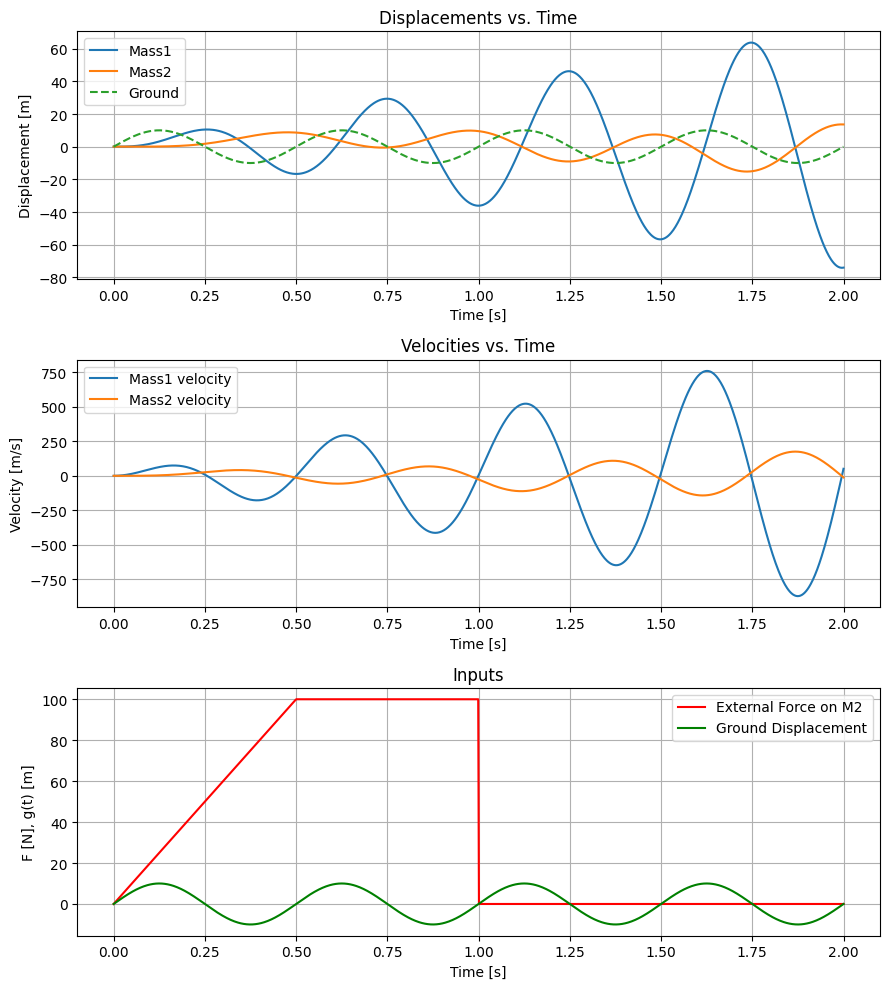

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# --- System Parameters ---
m1 = 1.0
m2 = 2.0
k1 = 100.0
k2 = 50.0

# If you want damping, uncomment these:
# c1 = 2.0
# c2 = 1.0
# has_damping = True
has_damping = False  # set True if using damping

# --- Define Ground Displacement g(t) ---
def ground_disp(t):
    """
    Example 1: Piecewise or simple function for g(t).
    Let's do a sinusoidal ground motion for demonstration:
        g(t) = 0.01 * sin(2*pi*2 * t)  (2 Hz, amplitude 0.01 m)
    """
    return 10.01 * np.sin(2.0 * np.pi * 2.0 * t)

def ground_vel(t):
    """
    Derivative of g(t).
    If g(t) = 0.01*sin(4*pi*t), then g'(t) = ...
    We'll just do the derivative analytically.
    """
    return 0.01 * (2.0*np.pi * 2.0) * np.cos(2.0*np.pi * 2.0 * t)

# --- Define Force on Mass 2 ---
def F_ext(t):
    """
    Example 2: Let's do a piecewise force:
      - Ramp from 0 to 100 N from t=0 to t=0.5s
      - Hold 100 N from t=0.5 to 1.0
      - Then drop to 0 after t=1.0
    Adjust as you like.
    """
    if t < 0.5:
        return 100.0 * (t / 0.5)
    elif t < 1.0:
        return 100.0
    else:
        return 0.0

# --- ODE System ---
def two_dof_system(t, Y):
    """
    Y = [x1, v1, x2, v2]
    We'll compute the accelerations a1, a2 based on:
      m1 a1 = -k1(x1 - g) (+ possible damping c1(v1 - g_dot)) + k2(x2 - x1) ...
      m2 a2 = -k2(x2 - x1) + F_ext(t) ...
    """
    x1, v1, x2, v2 = Y

    g_t = ground_disp(t)  # ground displacement
    F_t = F_ext(t)        # external force on mass 2

    # Spring forces
    spring_1 = -k1 * (x1 - g_t)      # from k1
    spring_2_on_m1 = k2 * (x2 - x1)  # from k2 (force on mass1)

    # If using damping:
    if has_damping:
        # c1, c2 as defined (uncomment them above)
        # damping force from damper c1: -c1*(v1 - ground_vel)
        # damping force from damper c2: -c2*(v2 - v1)
        # So net force on m1 includes + c2(v2 - v1) - c1(v1 - g_vel)
        d1 = -c1 * (v1 - ground_vel(t))
        d2_on_m1 = c2 * (v2 - v1)
    else:
        d1 = 0.0
        d2_on_m1 = 0.0

    # Equation for mass1
    # m1 * a1 = spring_1 + spring_2_on_m1 + damping_1 + damping_2
    a1 = (spring_1 + spring_2_on_m1 + d1 + d2_on_m1) / m1

    # Equation for mass2
    # from spring k2: force is -k2(x2 - x1) on mass 2
    # that is: -spring_2_on_m1 (because "spring_2_on_m1" was the force on mass1)
    # plus external force F_t
    # If damping c2, add the force from the damper: -c2(v2 - v1)
    # We'll handle that similarly:
    spring_2_on_m2 = -k2 * (x2 - x1)
    if has_damping:
        d2_on_m2 = -c2 * (v2 - v1)
    else:
        d2_on_m2 = 0.0

    a2 = (spring_2_on_m2 + d2_on_m2 + F_t) / m2

    return [v1, a1, v2, a2]

# --- Simulation ---
t_start = 0.0
t_end = 2.0
num_points = 1000
t_eval = np.linspace(t_start, t_end, num_points)

# Initial conditions: x1=0, v1=0, x2=0, v2=0
Y0 = [0.0, 0.0, 0.0, 0.0]

sol = solve_ivp(
    two_dof_system,
    [t_start, t_end],
    Y0,
    t_eval=t_eval,
    rtol=1e-8,
    atol=1e-8
)

time_vals = sol.t
x1_vals = sol.y[0]
v1_vals = sol.y[1]
x2_vals = sol.y[2]
v2_vals = sol.y[3]

# For reference, let's get ground displacement at each time
g_vals = np.array([ground_disp(ti) for ti in time_vals])
F_vals = np.array([F_ext(ti) for ti in time_vals])

# --- Plot Results ---
fig, axs = plt.subplots(3, 1, figsize=(9, 10))

# 1) Displacements
axs[0].plot(time_vals, x1_vals, label='Mass1')
axs[0].plot(time_vals, x2_vals, label='Mass2')
axs[0].plot(time_vals, g_vals, '--', label='Ground')
axs[0].set_title('Displacements vs. Time')
axs[0].set_xlabel('Time [s]')
axs[0].set_ylabel('Displacement [m]')
axs[0].legend()
axs[0].grid(True)

# 2) Velocities
axs[1].plot(time_vals, v1_vals, label='Mass1 velocity')
axs[1].plot(time_vals, v2_vals, label='Mass2 velocity')
axs[1].set_title('Velocities vs. Time')
axs[1].set_xlabel('Time [s]')
axs[1].set_ylabel('Velocity [m/s]')
axs[1].legend()
axs[1].grid(True)

# 3) Force and Ground motion
axs[2].plot(time_vals, F_vals, 'r', label='External Force on M2')
axs[2].plot(time_vals, g_vals, 'g', label='Ground Displacement')
axs[2].set_title('Inputs')
axs[2].set_xlabel('Time [s]')
axs[2].set_ylabel('F [N], g(t) [m]')
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()